In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
from qudra import DistributedEnergyOptimizer
import numpy as np

# Run on DWAVE's Annealer

In [4]:
scale = 100
env_cost = -100

abu_dhabi_params = {
    "A": np.array([550,570,450,130 + env_cost,300 + env_cost])/scale,
    "B": np.array([55.5,111,900,575 + env_cost, 400 + env_cost])/scale,
    "C": np.array([0.33,0.33,0.01,0.05 + env_cost/10000,0.05 + env_cost/10000])/scale,
    "P_min": [.6,.624,2.240,.240,.640],
    "P_max": [1.5,1.560,5.600,1.200,3.200],
    "alpha": 1e5, # alpha is the constant for the constraint for the cost function
    "beta": 10, # beta is the constant for the costraint for the cost function
    "L": 49155.34595/(365*24),
    "N": 7, # number of discrete states minus 1
    "plant_names": ["Shuweiat - Gas Turbine", "Umm Al Nar - Gas Turbine", "Barakah - Nuclear", "Noor Abu Dhabi - Solar", "Al Dhafra - Solar"]
}

deo = DistributedEnergyOptimizer(abu_dhabi_params)

In [5]:
_ = deo.run_annealer_qpu()

Plot using the annealer_qpu method:



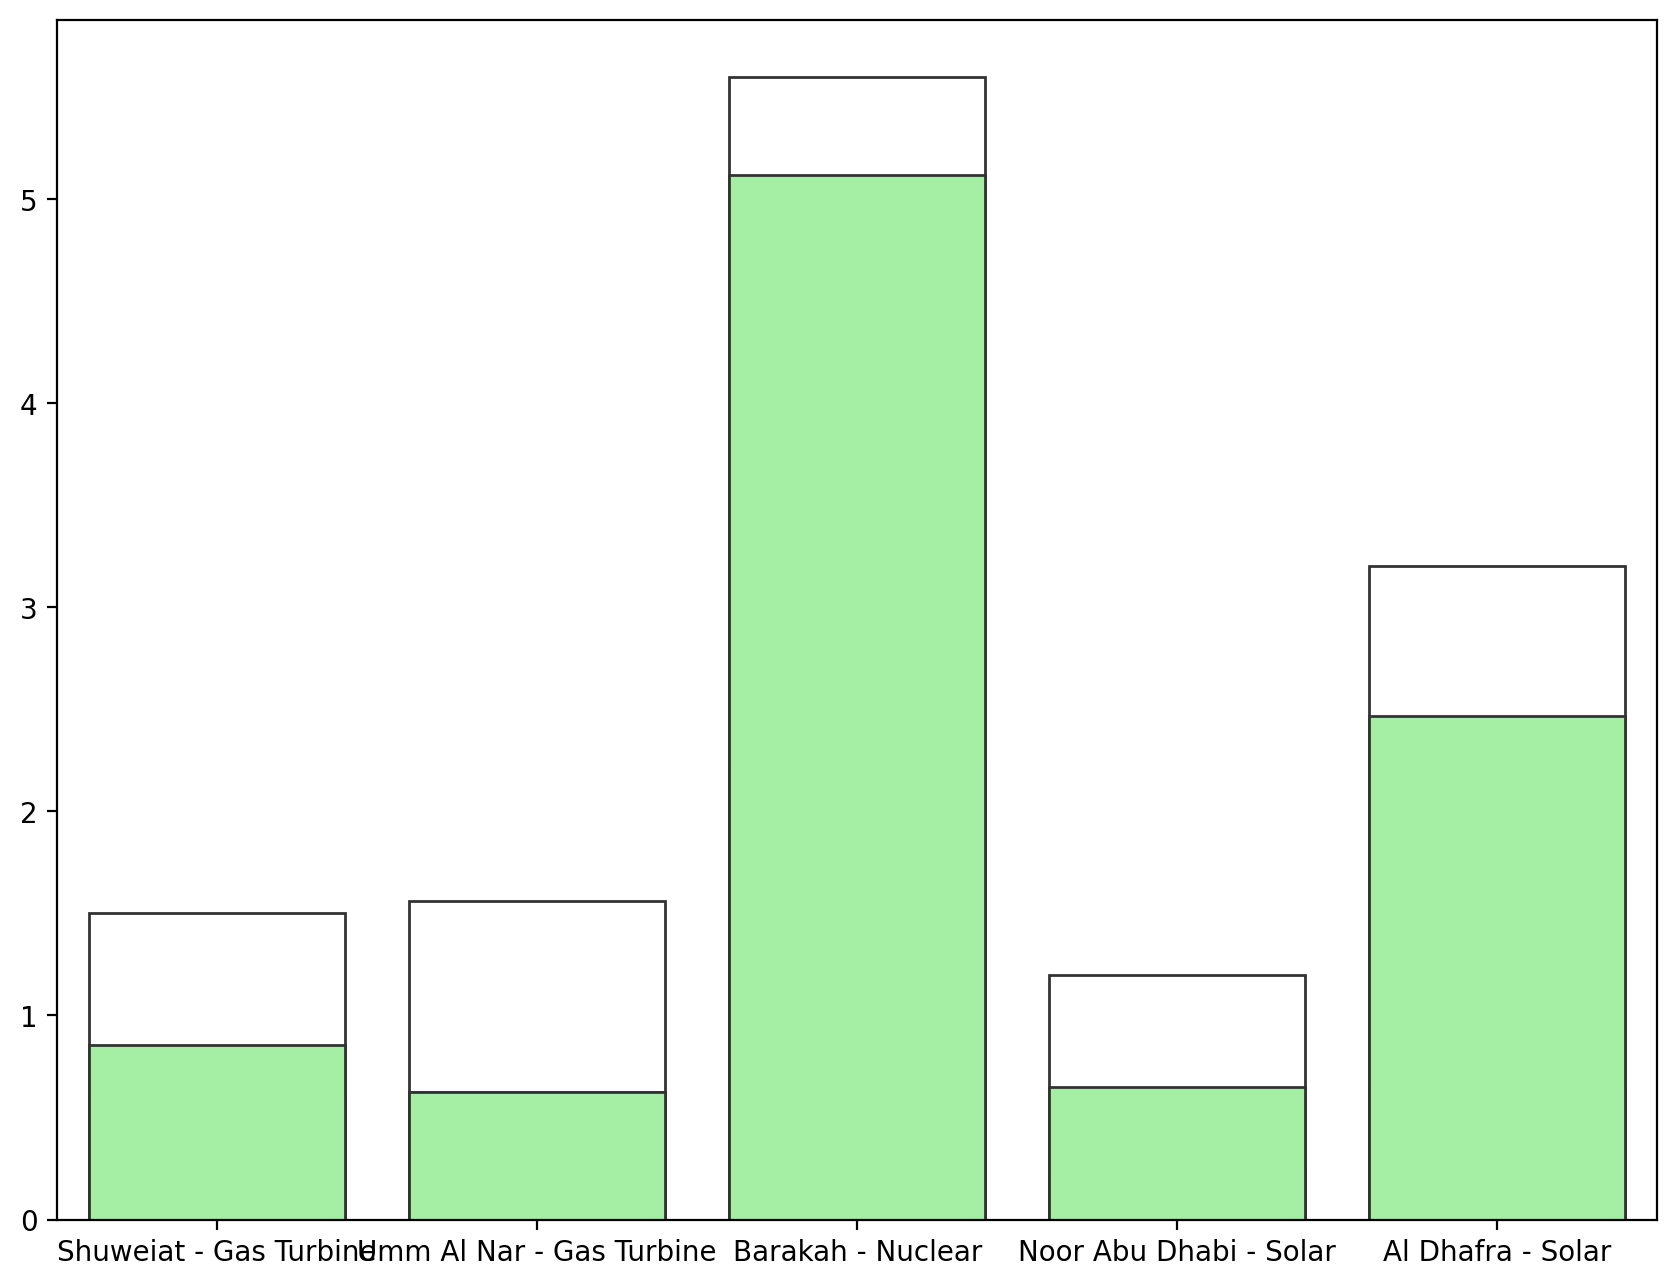

In [7]:
deo.plot_histogram("annealer_qpu")

# Simple Example Run on Simulators

In [5]:
simple_params = {
    "A": [0,0],
    "B": [0,0],
    "C": [0,0],
    "P_min": [1,1],
    "P_max": [3,4],
    "alpha": 1000, # alpha is the constant for the constraint for the cost function
    "beta": 6, # beta is the constant for the costraint for the cost function
    "L": 5,
    "N": 1 # number of discrete states minus 1
}

deo = DistributedEnergyOptimizer(simple_params)

In [6]:
deo.run_qaoa()
deo.print_results("qaoa")

Solution found using the qaoa method:

Minimum Cost: -30.0 ul
Optimal State: 
xv0:	0.0
xv1:	0.0
xz0,0:	0.0
xz0,1:	1.0
xz1,0:	1.0
xz1,1:	0.0

The solution was found within 168 evaluations of qaoa.


In [7]:
deo.run_vqe()
deo.print_results("vqe")

Solution found using the vqe method:

Minimum Cost: -30.0 ul
Optimal State: 
xv0:	0.0
xv1:	0.0
xz0,0:	0.0
xz0,1:	1.0
xz1,0:	1.0
xz1,1:	0.0

The solution was found within 25 evaluations of vqe.


In [8]:
deo.run_classical()
deo.print_results("classical")

Solution found using the classical method:

Minimum Cost: -30.0 ul
Optimal State: 
xv0:	0.0
xv1:	0.0
xz0,0:	0.0
xz0,1:	1.0
xz1,0:	1.0
xz1,1:	0.0

The solution was found within 0 evaluations of classical.


In [11]:
# grover's doesn't work as well
# deo.run_grover(num_iterations=1000)
# deo.print_results("grover")

In [13]:
deo.run_annealer_sim()
deo.print_results("annealer_sim")

Solution found using the annealer_sim method:

Minimum Cost: -30.0 ul
Optimal State: 
xv0:	0
xv1:	0
xz0,0:	0
xz0,1:	1
xz1,0:	1
xz1,1:	0

The solution was found with 100 shots of annealer_sim.
